# Project: Rainfall Prediction 

![ar](https://c0.wallpaperflare.com/preview/54/110/406/mountain-cloud-mist-fog.jpg)

# IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv('rainfall.csv')

In [3]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,wind_direction,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20,20.9


# Displaying Top 5 Rows Of the dataset

In [4]:
df.head(5)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,wind_direction,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40,13.7


# Displaying Last 5 Rows Of the dataset

In [5]:
df.tail(5)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,wind_direction,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20,23.3


# Find shape of our dataset

In [6]:
df.shape

(366, 12)

In [7]:
print("Number of Rows: ",df.shape[0])
print("Number of Column: ",df.shape[1])

Number of Rows:  366
Number of Column:  12


# Get information about our dataset like the Total number of Rows, Total number of Columns, Data type of each Column and Memory requirement

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      366 non-null    int64  
 1   pressure                 366 non-null    float64
 2   maxtemp                  366 non-null    float64
 3   temparature              366 non-null    float64
 4   mintemp                  366 non-null    float64
 5   dewpoint                 366 non-null    float64
 6   humidity                 366 non-null    int64  
 7   cloud                    366 non-null    int64  
 8   rainfall                 366 non-null    object 
 9   sunshine                 366 non-null    float64
 10           wind_direction  366 non-null    int64  
 11  windspeed                365 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 34.4+ KB


# Check null values in the Dataset

In [9]:
df.isnull().sum()

day                        0
pressure                   0
maxtemp                    0
temparature                0
mintemp                    0
dewpoint                   0
humidity                   0
cloud                      0
rainfall                   0
sunshine                   0
         wind_direction    0
windspeed                  1
dtype: int64

In [10]:
df['windspeed'].fillna(df['windspeed'].mean(), inplace=True)

In [11]:
df.isnull().sum() 

day                        0
pressure                   0
maxtemp                    0
temparature                0
mintemp                    0
dewpoint                   0
humidity                   0
cloud                      0
rainfall                   0
sunshine                   0
         wind_direction    0
windspeed                  0
dtype: int64

# Get overall on statistical about the dataset

In [12]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,wind_direction,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.803279,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.808494,10.055908
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.725000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.825000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


# Data Preprocessing

# Encoding the categorical data

In [13]:
df.replace({'rainfall':{'no':0, 'yes':1}}, inplace=True)

In [14]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,wind_direction,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20,20.9


# Data Visualization

<Axes: xlabel='rainfall', ylabel='count'>

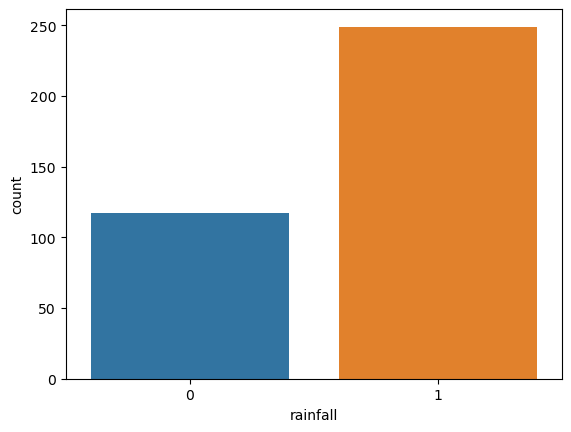

In [15]:
sns.countplot(data=df,x='rainfall') #making count plot for 'rainfall' column

<Axes: xlabel='rainfall'>

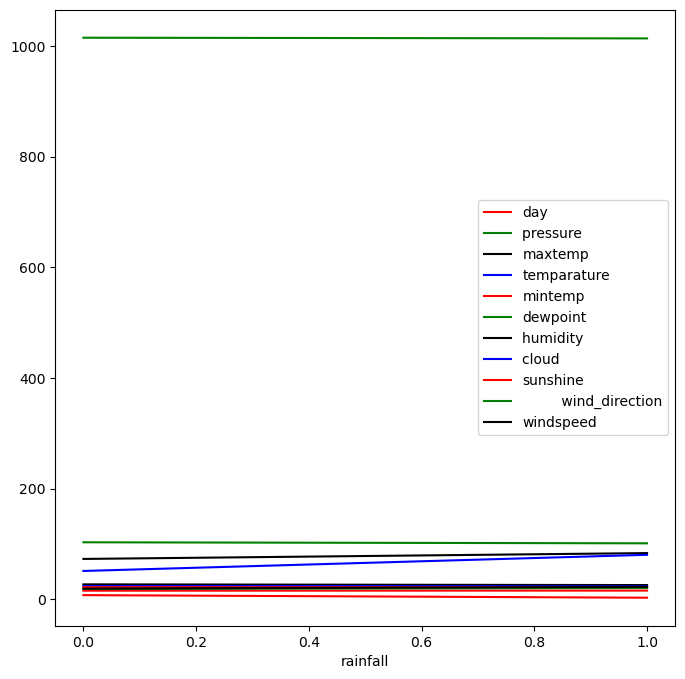

In [16]:
df.groupby('rainfall').mean().plot(color = ['red', 'green','black','blue'],
                                    fontsize=10.0,figsize=(8,8))

(array([ 1.,  0.,  1.,  1.,  0.,  2.,  3., 12.,  2., 20., 19., 17., 17.,
        13., 14., 13., 14., 17., 30., 32., 25., 40., 48., 22.,  3.]),
 array([ 4.9,  6. ,  7.1,  8.2,  9.3, 10.4, 11.5, 12.6, 13.7, 14.8, 15.9,
        17. , 18.1, 19.2, 20.3, 21.4, 22.5, 23.6, 24.7, 25.8, 26.9, 28. ,
        29.1, 30.2, 31.3, 32.4]),
 <BarContainer object of 25 artists>)

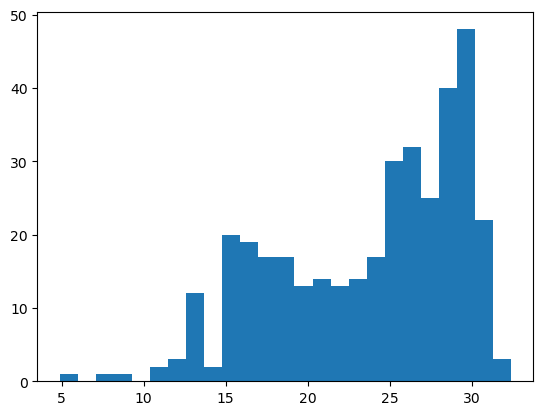

In [17]:
plt.hist(df.temparature,bins=25)

In [18]:
df1=pd.read_csv('rainfall.csv')

C:\Users\Khyathi\AppData\Local\Temp\ipykernel_17312\633330833.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df1.corr()


<Axes: >

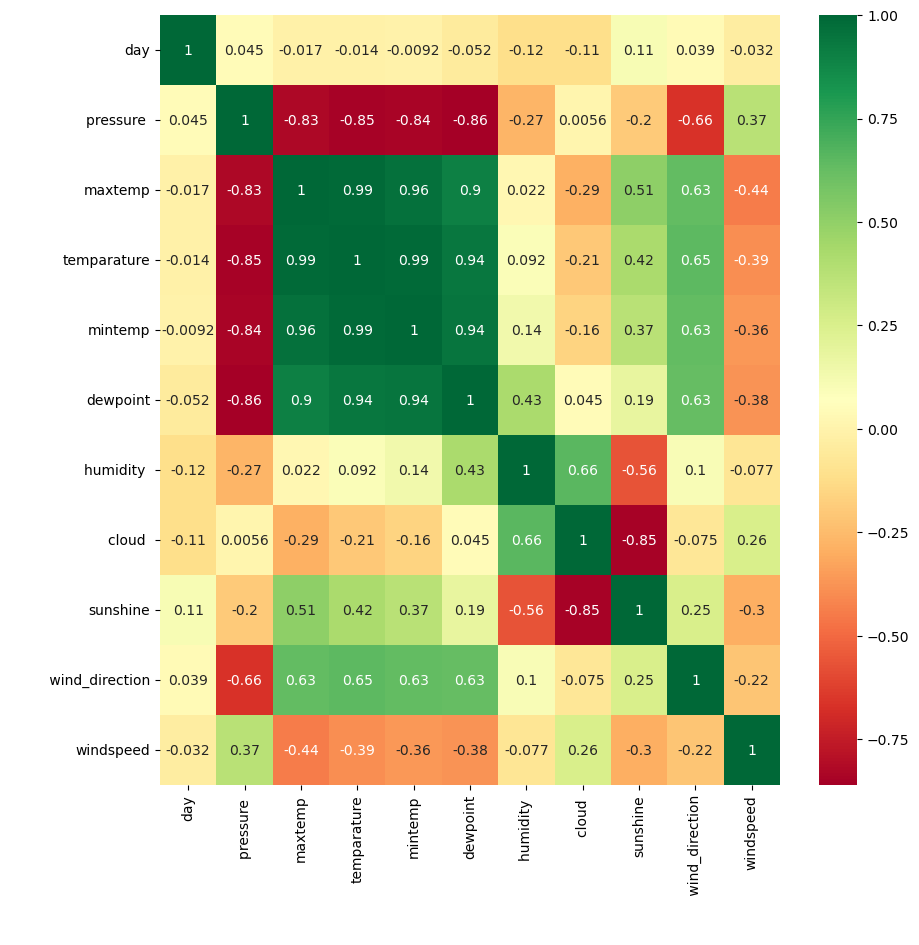

In [19]:
corrmat=df1.corr()
plt.figure(figsize=(10,10))
#plot heat map
sns.heatmap(corrmat, annot=True, cmap='RdYlGn')

<Axes: xlabel='day', ylabel='temparature'>

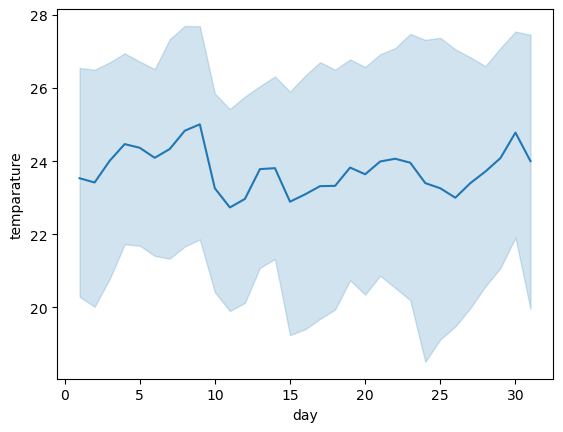

In [20]:
sns.lineplot(data=df, x="day", y="temparature")

<Axes: >

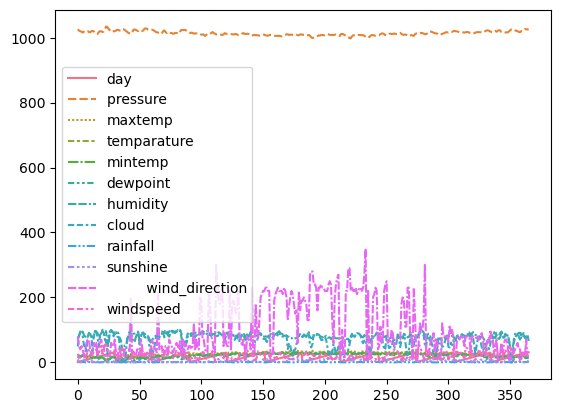

In [21]:
sns.lineplot(data=df)


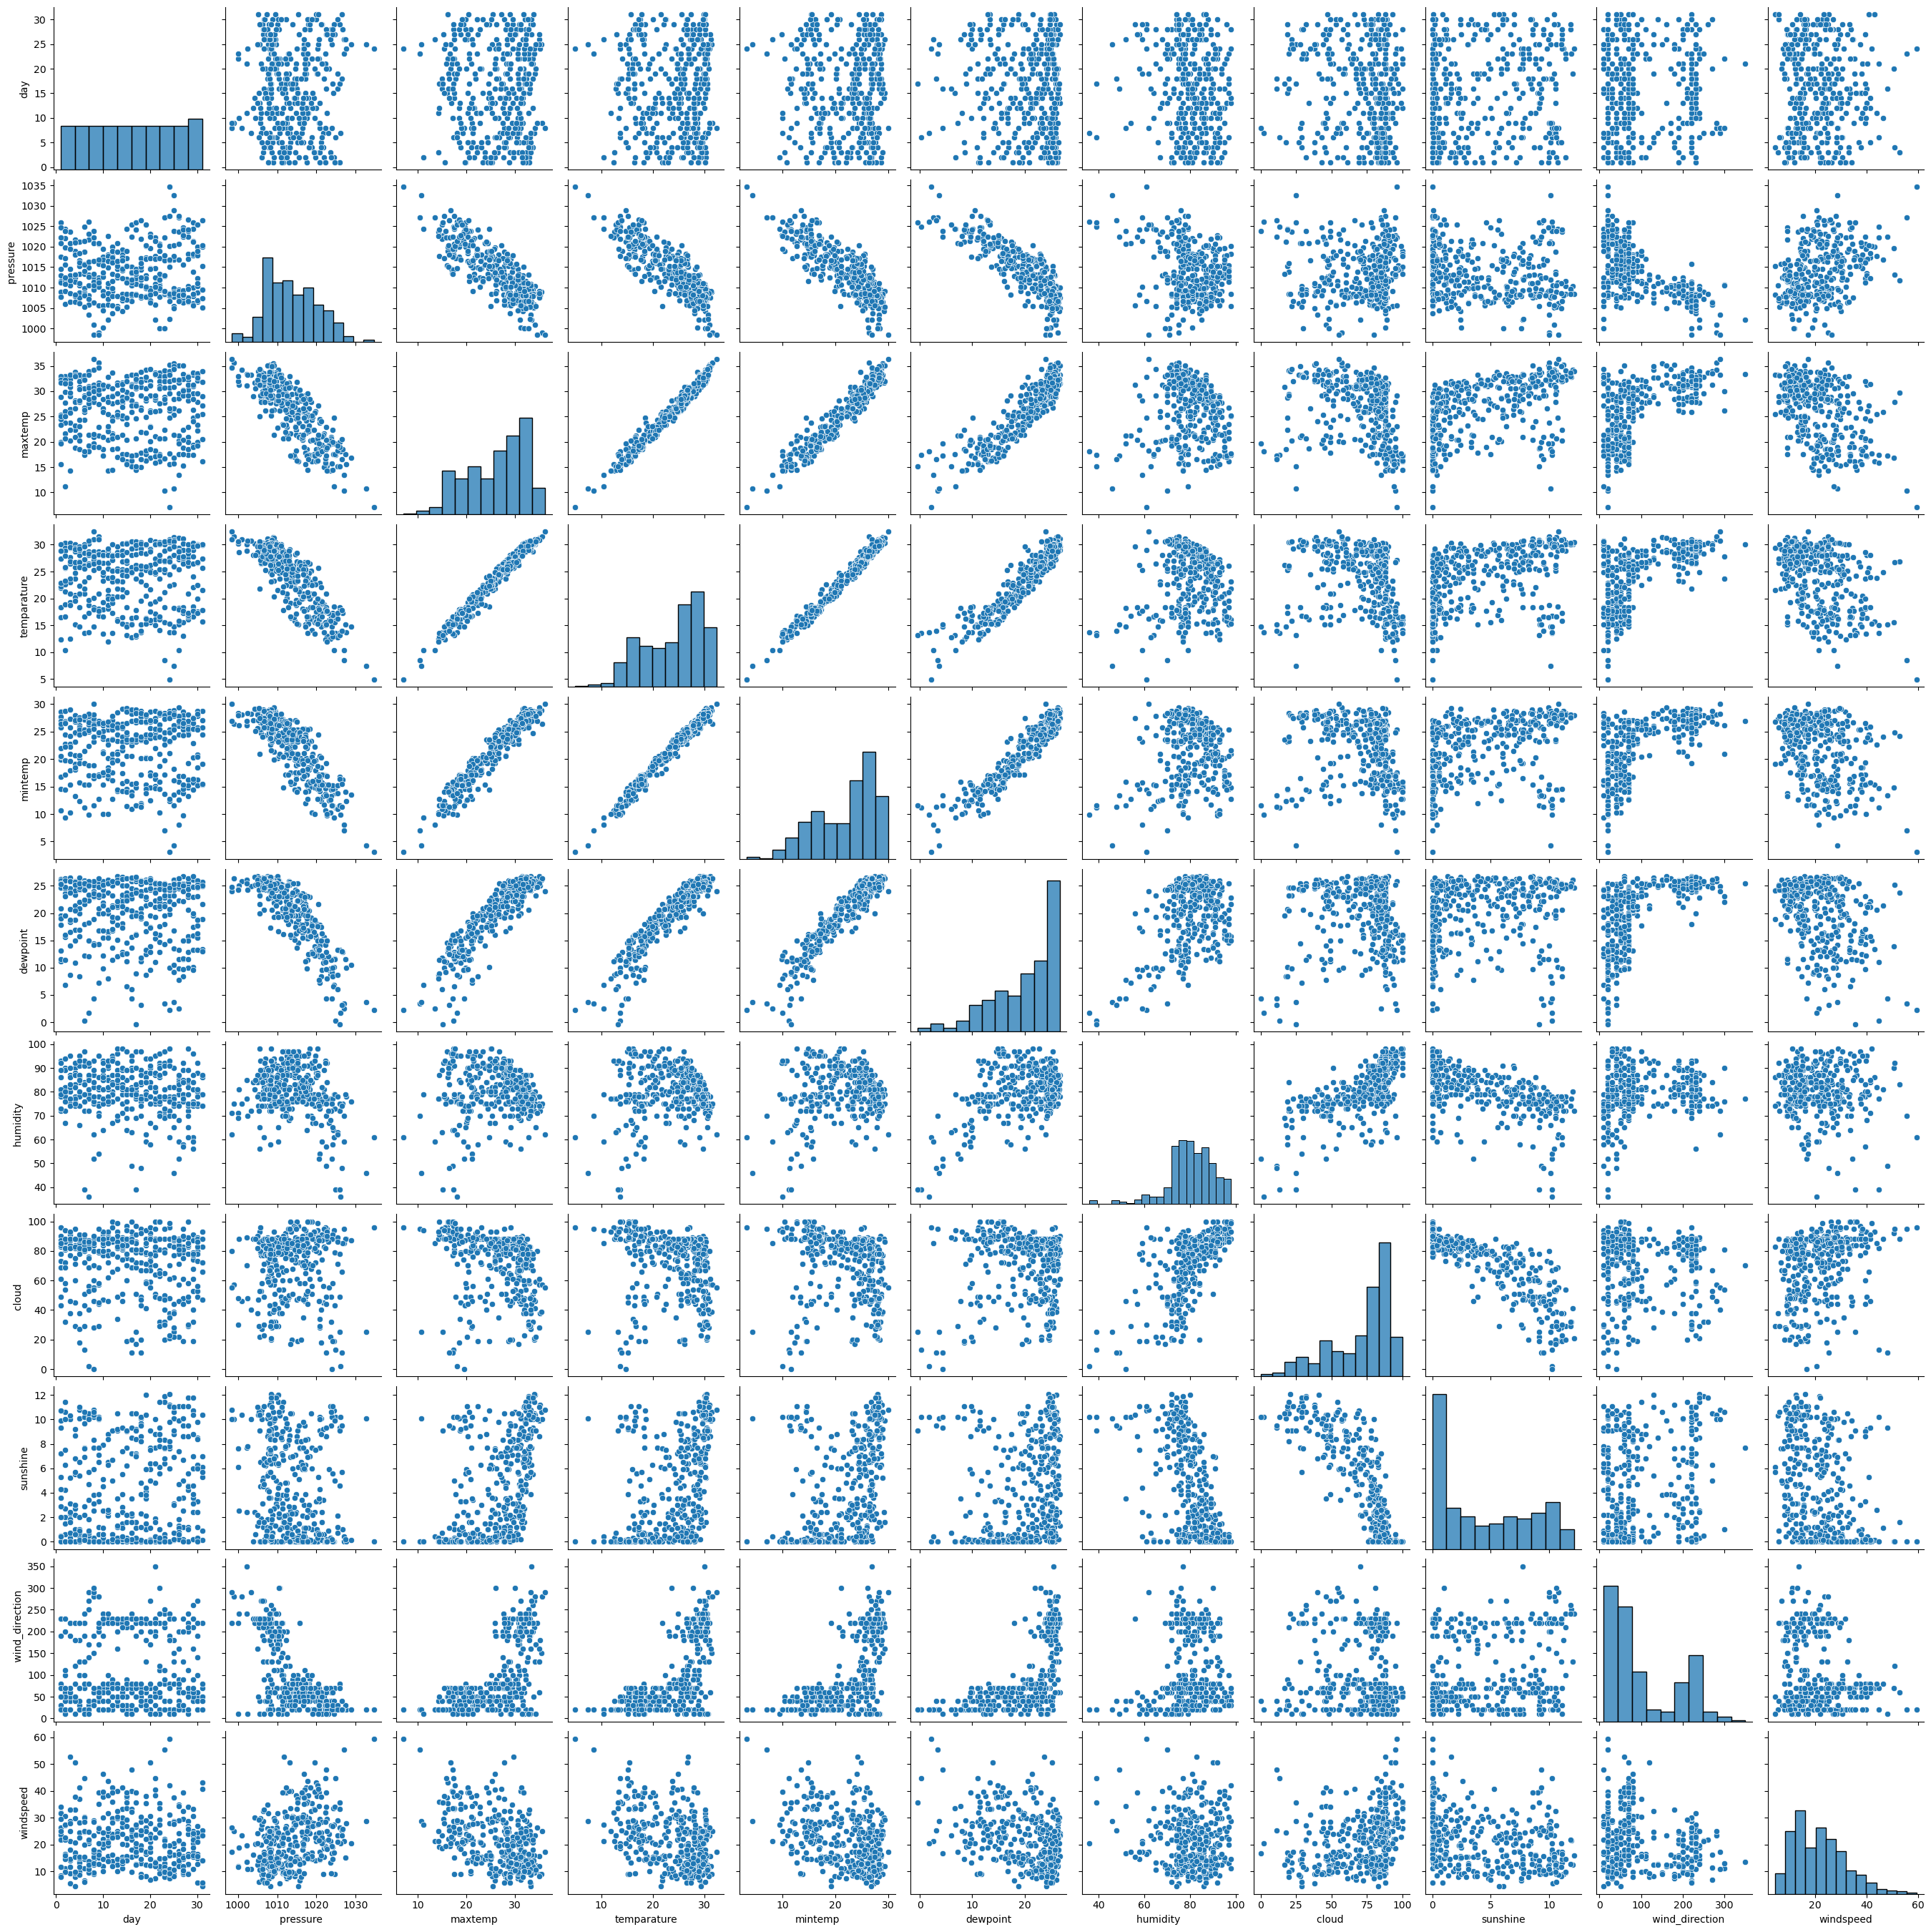

In [46]:
sns.pairplot(df1)

<Axes: xlabel='temparature', ylabel='dewpoint'>

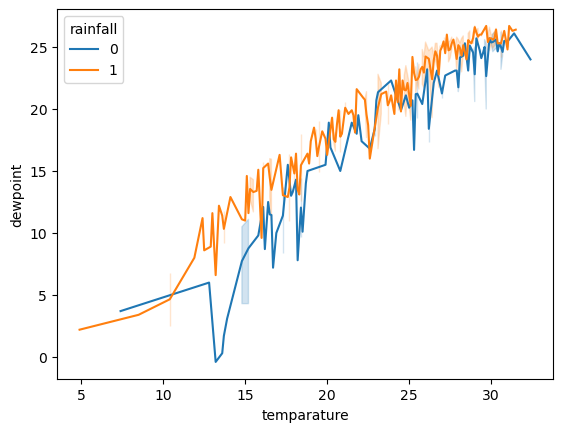

In [23]:
sns.lineplot(data=df, x="temparature", y="dewpoint", hue="rainfall")


# Model Building

# Store feature Matrix in x and Response(Target) In vector y

In [24]:
#Separation of dependent and independent
X=df.drop(columns={'day','rainfall'},axis=1) #idependent
Y=df['rainfall']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      366 non-null    int64  
 1   pressure                 366 non-null    float64
 2   maxtemp                  366 non-null    float64
 3   temparature              366 non-null    float64
 4   mintemp                  366 non-null    float64
 5   dewpoint                 366 non-null    float64
 6   humidity                 366 non-null    int64  
 7   cloud                    366 non-null    int64  
 8   rainfall                 366 non-null    int64  
 9   sunshine                 366 non-null    float64
 10           wind_direction  366 non-null    int64  
 11  windspeed                366 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 34.4 KB


# Splitting the data set into the training set and test set

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
print(X.shape,X_train.shape,X_test.shape)

(366, 10) (292, 10) (74, 10)


# Model Training

In [27]:
#implimenting the logistic regression bcs it is classification model
model = GaussianNB()

In [28]:
#training the logistic regression model with training data
model.fit(X_train,Y_train)

GaussianNB()

In [29]:
#accuracy on training data
Y_pred = model.predict(X_test)

In [30]:
print(Y_pred)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0]


In [31]:
train_data_accuracy = recall_score(Y_test,Y_pred)
print("Accuracy score of train_data_accuracy is :",train_data_accuracy )

Accuracy score of train_data_accuracy is : 0.8627450980392157


# Model evaluation on test data

In [32]:
rf1 = GaussianNB()
rf1.fit(X_test, Y_test)

GaussianNB()

In [33]:
y_pred = rf1.predict(X_test)
score = recall_score(Y_test,y_pred)
score

0.8431372549019608

In [34]:
rf=GaussianNB()
rf_final=rf.fit(X,Y)

In [35]:
Y_predT=rf1.predict(X_test)

In [36]:
Y_predT

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [37]:
accuracy_rf1=recall_score(Y_test,Y_predT)

In [38]:
print("accuracy score of test data is :",accuracy_rf1)

accuracy score of test data is : 0.8431372549019608


# Save The Model

In [39]:
rf =GaussianNB()
rf_final = rf.fit(X,Y)

In [40]:
import joblib

In [41]:
joblib.dump(rf_final,"Rainfall_Prediction")

['Rainfall_Prediction']

In [42]:
model = joblib.load("Rainfall_Prediction")

# Prediction on New Data

In [43]:
data_new= pd.DataFrame({
   'pressure ':1020.1,
    'maxtemp':16.8,
    'temparature':15.5,
    'mintemp':14.8,
    'dewpoint':013.9,
    'humidity ':90,
    'cloud ':92,
    'sunshine':0,
    '         wind_direction':70,
    'windspeed':50.6
}, index=[0])

In [44]:
data_new

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,wind_direction,windspeed
0,1020.1,16.8,15.5,14.8,13.9,90,92,0,70,50.6


In [45]:
model.predict(data_new)

array([1], dtype=int64)